In [99]:
from scipy.optimize import root_scalar
import numpy as np
import matplotlib.pyplot as plt

0.4999427327618892
c0 = 0.29397840519592444


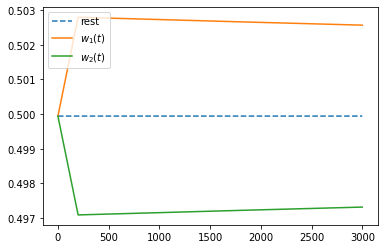

In [100]:
c_tot = 0.3
epsilon = 50
beta = 0.5
phi = 0.000001
k = 0.0000008505

def c(w):
    return np.log10(w)/epsilon + c_tot

def dwdt(u):
    def f(t, w):
        return epsilon*w*np.log(10)*(-k*c(w) + phi*u*(1-w))
    return f
    
def solve(w0, U):
    W = np.zeros(np.shape(U))
    W[0] = w0
    for t in range(1, len(U)):
        delta = dwdt(U[t])(t, W[t-1])
        #print(delta)
        W[t] = W[t-1] + delta
    return W

roots = root_scalar(lambda w: dwdt(beta)(0, w), bracket=[0.1, 1])
fixpoint = roots.root
print(fixpoint)
    
t = 3000
T = np.arange(t)
U = np.ones(t) * beta

U[T < 200] = beta + 0.5
W1 = solve(fixpoint, U)

U[T < 200] = beta - 0.5
W2 = solve(fixpoint, U)

#print(dwdt(beta)(0, 0.4153))

print("c0 =", c(fixpoint))

#plt.plot(T, U, label="$u(t)$")
plt.plot(T, np.ones(t)*fixpoint, "--", label="rest")
plt.plot(T, W1, label="$w_1(t)$")
plt.plot(T, W2, label="$w_2(t)$")
#plt.ylim([0, 1])
plt.legend()
plt.show()

The problem seems to be that we cannot choose realistic parameters so that the gain is both large enough to be readable.

Experiment above with increasing the gain without making decay too large by making $\phi$ and $k$ tiny and $\epsilon$ huge.

https://www.desmos.com/calculator/cuk2lftyrz